In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.autograd
from torch.autograd import Variable



df_iris = pd.read_csv(u'data/iris.txt',sep=' ')
df_iris

fields = ['sl','sw','pl','pw','c']

N = len(fields)
degree = 3

features_array = np.array(df_iris[fields[0:4]])
target_array = np.array(df_iris[fields[4]])

features = Variable(torch.from_numpy(features_array).double())
target = Variable(torch.from_numpy(target_array).double())
w = Variable(torch.randn(degree+1).double(), requires_grad=True)



eta =  0.0001


In [2]:
for epoch in range(10000):
    ## Compute the forward pass
    f = torch.matmul(features, w)
    #print(f)
    E = torch.sum((target-f)**2)

    if epoch%1000 == 0: 
        print(epoch,':',E.item())

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    w.data.add_(-eta * w.grad.data)
    #print(w.grad.data)
    
    # Reset the gradients, as otherwise they are accumulated in param.grad
    w.grad.zero_()
    
print(epoch,':',E.item(),w)

0 : 31136.334639008935
1000 : 10.27911625627928
2000 : 8.97765703682064
3000 : 8.680556987876843
4000 : 8.60837181642515
5000 : 8.590795753632438
6000 : 8.586515928918145
7000 : 8.585473776144507
8000 : 8.58522000816087
9000 : 8.585158214735463
9999 : 8.585143174658684 tensor([0.0658, 0.0612, 0.2031, 0.5476], dtype=torch.float64, requires_grad=True)


[[50.  0.  0.]
 [ 0. 48.  2.]
 [ 0.  4. 46.]]
Accuracy: 96.0 %


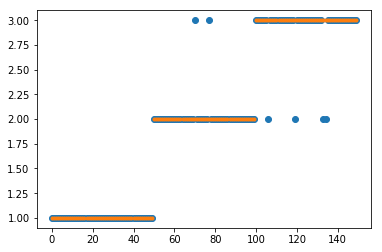

In [49]:
result = torch.matmul(features, w).round()

plt.plot(result.data.numpy().squeeze(),'o')
plt.plot(target.data.numpy().squeeze(),'.')
plt.show

confusion_matrix = np.zeros((3,3))

for i in range(len(result)):
    confusion_matrix[int(target[i] - 1), int(result[i] - 1)] += 1
    
print(confusion_matrix)

accuracy = np.sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)

print("Accuracy:", accuracy*100, "%")